© Ritwik Chandra Pandey


2nd MSc (Maths) - Specialisation in CS

##IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display
import warnings

## IGNORING WARNINGS

In [2]:
warnings.filterwarnings('ignore')

##IMPORTING THE DATASET

In [3]:
Train_data_full = pd.read_csv('train.csv')
Test_data_full = pd.read_csv('test.csv')

## BASIC INFORMATION ABOUT THE DATASET

### Number of Null values in each column of Train_data_full and Test_data_full

In [4]:
pd.set_option('display.max_rows', None)
Train_data_full.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
Test_data_full.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
Train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
Test_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
#Describing the label to be predicted in train.scv
Train_data_full['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##DATA PREPROCESSING

### DROP ID COLUMN

In [9]:
Train_data = Train_data_full.drop(['Id'], axis=1)
Test_data = Test_data_full.drop(['Id'], axis=1)

### CHECKING FOR SKEWNESS OF SALE PRICE

Skewness: 1.882876



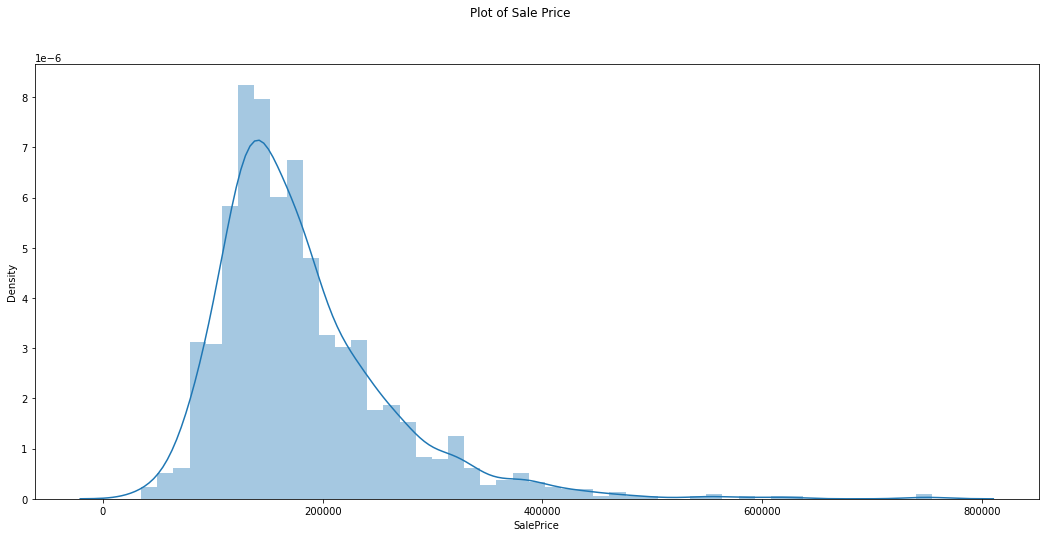

In [10]:
fig = plt.figure(figsize=(18,8))
sns.distplot(Train_data['SalePrice'])
plt.suptitle( "Plot of Sale Price")
print("Skewness: %f" % Train_data['SalePrice'].skew() + "\n")
plt.show()

We shall apply log transformation to correct the positive skewness in the data

More importantly, taking logs means that errors in predicting expensive and cheap houses will affect the result equally.


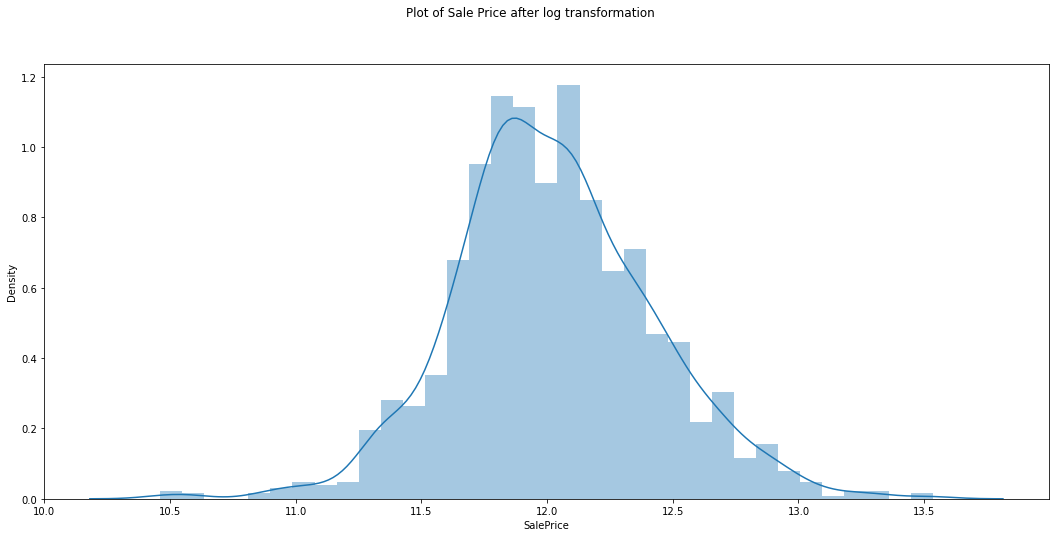

In [11]:
fig = plt.figure(figsize=(18,8))
Train_data['SalePrice'] = np.log1p(Train_data['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(Train_data['SalePrice'])
plt.show()

### HANDLING NULL VALUES

In [12]:
def missing (df):
    
    # drop theses columns due to large numbeer of null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1) 
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None")
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    # Null value likely means typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    # Only one null value so fill as the most frequent
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): 
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    return df

In [13]:
Train_ = missing(Train_data)
Test_ = missing(Test_data)
# calculate total number of null values in training data
null_train_set = Train_.isnull().sum().sum()
print(null_train_set)
# calculate total number of null values in test data
null_test_set = Test_.isnull().sum().sum()
print(null_test_set)

0
0


### MERGING RELATED COLUMNS BY ADDING

In [14]:
def add_new_cols(df):
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + \
                             df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch']) 
    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [15]:
Train_added = add_new_cols(Train_)
Test_added = add_new_cols(Test_)

### GETTING DUMMY VALUES FOR CATEGORICAL DATA

In [16]:
columnsToEncode = Train_added.select_dtypes(include=[object]).columns
columnsToEncode1 = Test_added.select_dtypes(include=[object]).columns
Train_encoded = pd.get_dummies(Train_added, columns=columnsToEncode, drop_first=False)
Test_encoded = pd.get_dummies(Test_added, columns=columnsToEncode, drop_first=False)
Train_y = Train_encoded['SalePrice']
Train_encoded = Train_encoded.drop(['SalePrice'], axis = 1)

###ALIGNING TRAINING AND TESTING DATA USING INNER JOIN

In [17]:
#List of all columns in Train_encoded which is not part of Test_encoded
list(set(list(Train_encoded.columns)) - set(list(Test_encoded.columns)))

['RoofMatl_ClyTile',
 'Exterior2nd_Other',
 'Electrical_Mix',
 'Heating_OthW',
 'Condition2_RRAe',
 'RoofMatl_Membran',
 'HouseStyle_2.5Fin',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Condition2_RRAn',
 'RoofMatl_Roll',
 'GarageQual_Ex',
 'Heating_Floor',
 'Condition2_RRNn',
 'RoofMatl_Metal']

In [18]:
#Inner join to remove columns in Train_encoded which are not part of Test_encoded
Train_aligned, Test_aligned= Train_encoded.align(Test_encoded, join = 'inner', axis=1) 
print(Train_aligned.shape)
print(Test_aligned.shape)

(1460, 278)
(1459, 278)


## SPLITTING THE DATASET

In [19]:
X, y = Train_aligned, Train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=118)

#MULTIPLE LINEAR REGRESSION

###Simple Linear Regression is not possible in this case as there are multiple independent variables.

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_mlr = np.expm1(regressor.predict(Test_aligned))

Train MSE: 0.008506752500576458

Test MSE: 0.03444764103925788



#POLYNOMIAL REGRESSION

In [21]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
y_train_pred = lin_reg.predict(X_poly)
y_pred = lin_reg.predict(X_poly_test)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_pr = np.expm1(lin_reg.predict(poly_reg.fit_transform(Test_aligned)))

Train MSE: 4.581046178560643e-22

Test MSE: 4.366868219461629



##REGRESSION USING DECISION TREE

In [22]:
regressorDT = DecisionTreeRegressor(random_state = 0)
regressorDT.fit(X_train, y_train)
y_pred = regressorDT.predict(X_test)
y_train_pred = regressorDT.predict(X_train)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_dt = np.expm1(regressorDT.predict(Test_aligned))

Train MSE: 9.262554660129297e-33

Test MSE: 0.050736391964679224



##REGRESSION USING RANDOM FOREST

In [23]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred_rf = np.expm1(rf.predict(Test_aligned))
train_mse1 = mean_squared_error(y_train_pred, y_train)
test_mse1 = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse1) + '\n')
print('Test MSE: ' + str(test_mse1) + '\n')

Train MSE: 0.0026355992985092848

Test MSE: 0.024350114657155735



### Finding importance of each feature and visualising them

In [24]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
most_importance = [x for x in feature_importances if x[1] != 0.0] 
most_importance_names = [x[0] for x in most_importance]
most_importance_values = [x[1] for x in most_importance]

Variable: OverallQual          Importance: 0.44
Variable: Total_SF             Importance: 0.28
Variable: Total_Square_Feet    Importance: 0.08
Variable: Total_Quality        Importance: 0.02
Variable: LotArea              Importance: 0.01
Variable: YearBuilt            Importance: 0.01
Variable: YearRemodAdd         Importance: 0.01
Variable: TotalBsmtSF          Importance: 0.01
Variable: 1stFlrSF             Importance: 0.01
Variable: GrLivArea            Importance: 0.01
Variable: GarageYrBlt          Importance: 0.01
Variable: GarageArea           Importance: 0.01
Variable: BsmtQual_Ex          Importance: 0.01
Variable: MSSubClass           Importance: 0.0
Variable: LotFrontage          Importance: 0.0
Variable: OverallCond          Importance: 0.0
Variable: MasVnrArea           Importance: 0.0
Variable: BsmtFinSF1           Importance: 0.0
Variable: BsmtFinSF2           Importance: 0.0
Variable: BsmtUnfSF            Importance: 0.0
Variable: 2ndFlrSF             Importance: 0.0


###Plotting only for those features that have importance more than 0.0

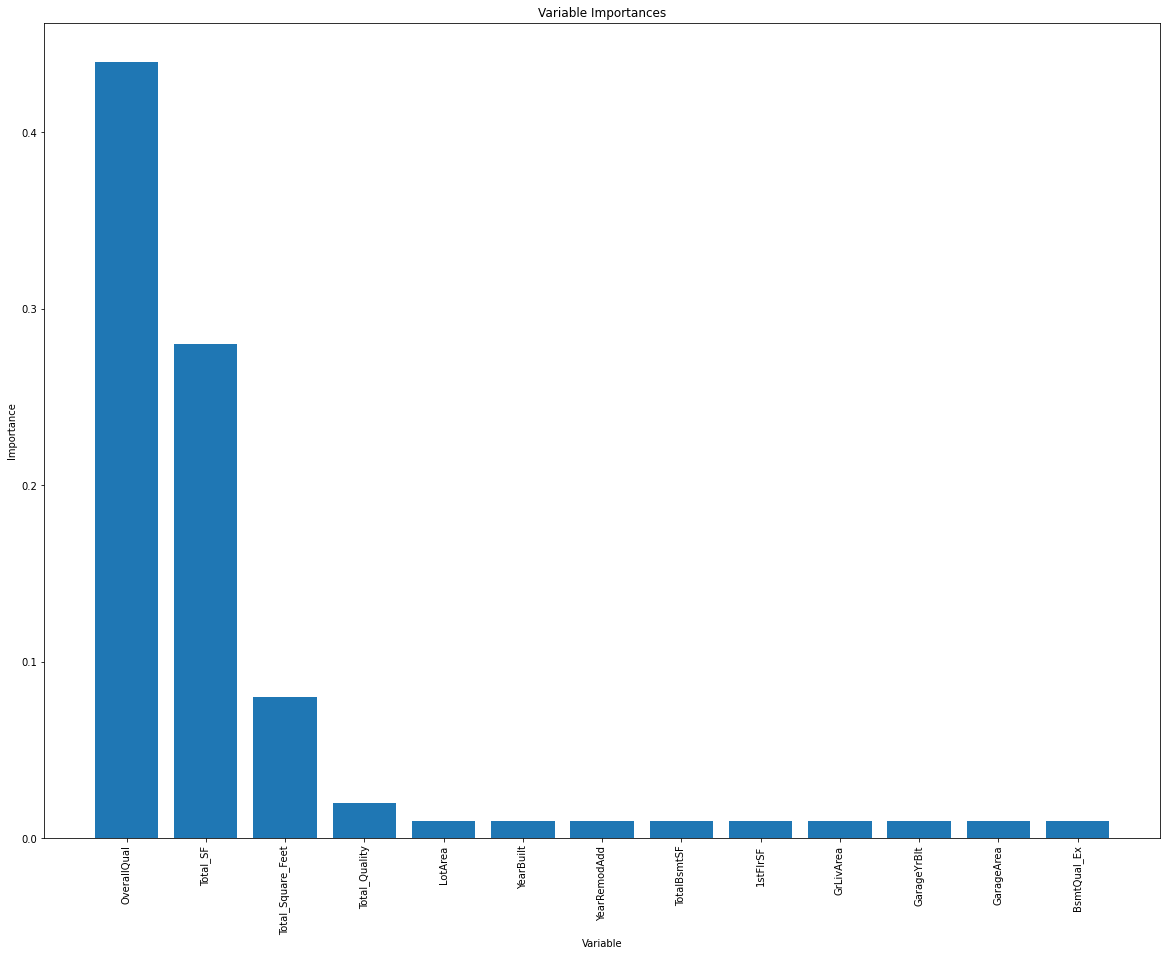

In [25]:
plt.figure(figsize=(20,15))
x_values = list(range(len(most_importance_values)))
plt.bar(x_values, most_importance_values, orientation = 'vertical')

plt.xticks(x_values, most_importance_names, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Visualising Random Forest Graph

In [26]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(X.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
display(Image('tree.png'))

### Building a new model by only taking the most important metrics

In [27]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [ 'OverallQual', 'Total_SF', 'Total_Square_Feet']
train_important = X_train[important_indices].copy()
test_important = X_test[important_indices].copy()
rf_most_important.fit(train_important, y_train)
predictions = rf_most_important.predict(test_important)
predictions_train = rf_most_important.predict(train_important)
predictions_test_pred_rfi = np.expm1(rf_most_important.predict(Test_aligned[[ 'OverallQual', 'Total_SF', 'Total_Square_Feet']]))
train_mse2 = mean_squared_error(predictions_train, y_train)
test_mse2 = mean_squared_error(y_test, predictions )
print('Train MSE: ' + str(train_mse2) + '\n')
print('Test MSE: ' + str(test_mse2) + '\n')

Train MSE: 0.004333614774789146

Test MSE: 0.03493676670772804



### Comparing both Random Forest models

In [28]:
print('Train MSE for Random Forest Model: ' + str(train_mse1) )
print('Test MSE for Random Forest Model: ' + str(test_mse1) + '\n')
print('Train MSE for Random Forest Model with only important features: ' + str(train_mse2))
print('Test MSE for Random Forest Model with only important features: ' + str(test_mse2) + '\n')

Train MSE for Random Forest Model: 0.0026355992985092848
Test MSE for Random Forest Model: 0.024350114657155735

Train MSE for Random Forest Model with only important features: 0.004333614774789146
Test MSE for Random Forest Model with only important features: 0.03493676670772804



## Comparing predictions on Test Set of all models

In [29]:
df_mlr = pd.DataFrame(y_test_pred_mlr, columns = ['MLR'])
df_pr = pd.DataFrame(y_test_pred_pr, columns = ['PR'])
df_dt = pd.DataFrame(y_test_pred_dt, columns = ['DT'])
df_rf = pd.DataFrame(y_test_pred_rf, columns = ['RF'])
df_rfi = pd.DataFrame(predictions_test_pred_rfi, columns = ['RF (Imp)'])
df_all = pd.concat([df_mlr, df_pr, df_dt, df_rf, df_rfi], axis = 1)

In [30]:
df_all

MLR            PR        DT             RF       RF (Imp)
0     127675.316191  1.050283e+05  124500.0  127721.454004  129414.498096
1     101645.991269  6.612847e+03  185000.0  168325.302752  170434.752008
2     183230.917143  1.296504e+05  168000.0  164729.339757  143540.247375
3     200734.107537  1.583834e+05  185000.0  185885.832017  187584.125809
4     193949.915619  1.334958e+05  185000.0  189810.584145  203187.850899
5     171308.099352  1.908062e+05  178900.0  180258.412765  171797.873496
6     184320.143116  1.919128e+05  151000.0  174522.274631  174934.120497
7     164621.620412  1.877262e+05  178900.0  171568.762267  134257.610720
8     194811.246433  1.551821e+05  215200.0  187871.549202  193004.609452
9     118423.283928  1.027059e+05  112500.0  122859.459583  124828.970018
10    170275.569375  1.659672e+05  195000.0  202596.105614  218874.641062
11     99960.456225  1.029806e+05  118000.0   93986.767316  104163.977927
12     95204.782187  7.804866e+04   85400.0  104967.361014  131675.993649
13    146676.605514  1.588921e+05  148500.0  151214.163549  169496.267968
14    117936.673951  1.097768e+05  198900.0  141225.244824  124890.777472
15    369176.925301  3.803875e+05  370878.0  371640.764920  339991.554373
16    254639.988512  2.511000e+05  262500.0  248396.339915  251766.092399
17    314211.978870  2.957766e+05  320000.0  307939.647662  300974.579682
18    302768.261001  3.509319e+05  312500.0  297645.766344  269618.998546
19    566346.992175  4.126060e+05  184750.0  426105.758668  454565.922908
20    323991.482986  2.867667e+05  271900.0  295589.701330  321807.271494
21    206315.612608  2.037715e+05  210000.0  205453.797553  219820.844261
22    180450.080108  1.405934e+05  181000.0  175296.064981  162397.569387
23    170495.381762  1.729429e+05  160200.0  167063.028171  156473.190886
24    187293.730836  2.712657e+05  184100.0  176053.625661  156451.821508
25    189302.374822  2.052568e+05  225000.0  203403.509292  210575.719286
26    349189.844257  2.960684e+05  276000.0  332345.908248  293684.534205
27    240134.078902  3.203055e+05  249700.0  247722.753655  247411.645184
28    203165.322835  2.625843e+05  179900.0  198362.961619  183399.237293
29    255509.204928  3.196147e+05  215000.0  198484.947323  176143.227474
30    195125.970156  2.126219e+05  191000.0  186840.789296  188181.950377
31     93205.590776  8.961341e+04  102000.0   98824.286510   98898.843599
32    163815.720213  6.343399e+04  182900.0  175352.938798  173067.962437
33    282139.089999  1.859437e+06  290000.0  296291.990407  326414.206105
34    283966.621635  2.657580e+05  260000.0  289152.557969  334662.952627
35    238709.257653  2.662617e+05  195000.0  223269.303236  223191.739897
36    186308.156129  2.787222e+05  191000.0  190976.427246  182822.199372
37    178350.551527  1.363314e+05  151000.0  154846.730544  162087.758472
38    161519.097653  1.046003e+05  151000.0  155239.788335  169683.564325
39    159000.351392  1.446650e+05  155900.0  141806.778443  135613.167762
40    183201.241698  2.006892e+05  179200.0  171514.354645  163323.805345
41    156273.166605  1.815832e+05  162000.0  162620.649738  135648.379286
42    352683.835821  4.725819e+05  295493.0  292429.807319  273297.740905
43    243463.345134  2.343271e+05  275000.0  230162.990386  183376.638431
44    236251.319375  2.787420e+05  219500.0  227248.650681  220492.787949
45    188667.950489  2.360115e+05  215000.0  189805.004102  205537.640521
46    257506.631289  2.116458e+05  193500.0  218225.133656  233648.358061
47    201821.553119  2.589403e+05  193500.0  194561.735300  215083.932307
48    155415.665106  2.107748e+05  162000.0  162542.207666  177106.357987
49    147040.709917  1.661958e+05  143000.0  145218.785915  137954.203066
50    162208.670940  1.642711e+05  147500.0  145828.002244  152724.073704
51    183025.186508  1.542443e+05  138000.0  152918.801330  168159.104679
52    146074.183700  2.013357e+05  163000.0  155894.785950  149465.514683
53    160499.924815 